In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data_dict = {}

# data = pd.read_csv('../data/postprocessing/231121_compare_restructured_models/231121_old_structure_output_time_series.csv', index_col=0)
data = pd.read_csv('../data/postprocessing/231121_compare_restructured_models/231121_old_structure_output_time_series.csv')
data_dict['old'] = data
data = pd.read_csv('../data/postprocessing/231121_compare_restructured_models/231123_storage_block_output_time_series.csv', index_col=0)
data_dict['blocks'] = data
data = pd.read_csv('../data/postprocessing/231121_compare_restructured_models/231123_network_output_time_series.csv', index_col=0)
data_dict['network'] = data


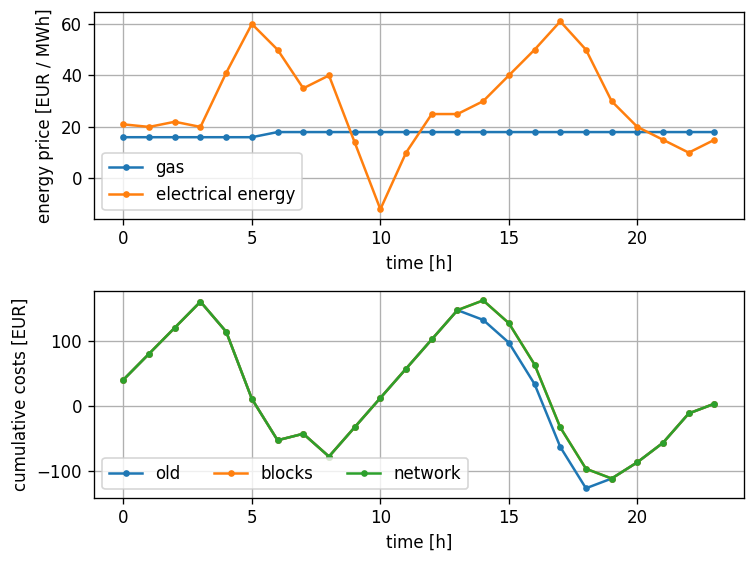

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=120)

data_dict['old']['gas_price'].plot(ax=ax1, style=".-", label='gas')
data_dict['old']['power_price'].plot(ax=ax1, style=".-", label='electrical energy')
ax1.set_xlabel('time [h]')
ax1.set_ylabel('energy price [EUR / MWh]')
ax1.legend()
ax1.grid()

for key in data_dict.keys():
    if key == 'old':
        gas_costs = data_dict[key]['bhkw_gas'] * data_dict[key]['gas_price']
        power_costs = data_dict[key]['net_power'].where(data_dict[key]['net_power'] <= 0, 0) * data_dict[key]['power_price']
        power_revenue = data_dict[key]['net_power'].where(data_dict[key]['net_power'] >= 0, 0) * data_dict[key]['power_price']
        costs = gas_costs - power_costs - power_revenue

        costs.cumsum().plot(ax=ax2, style=".-", label=key)
    
    elif key == 'blocks':
        gas_costs = data_dict[key]['chp.gas'] * data_dict[key]['gas_price']
        power_costs = data_dict[key]['electrical_grid.power'].where(data_dict[key]['electrical_grid.power'] <= 0, 0) * data_dict[key]['power_price']
        power_revenue = data_dict[key]['electrical_grid.power'].where(data_dict[key]['electrical_grid.power'] >= 0, 0) * data_dict[key]['power_price']
        costs = gas_costs - power_costs - power_revenue

        costs.cumsum().plot(ax=ax2, style=".-", label=key)
    
    else:
        gas_costs = data_dict[key]['chp.gas'] * data_dict[key]['gas_price']
        power_costs = data_dict[key]['electrical_grid.overall_power'].where(data_dict[key]['electrical_grid.overall_power'] >= 0, 0) * data_dict[key]['power_price']
        power_revenue = data_dict[key]['electrical_grid.overall_power'].where(data_dict[key]['electrical_grid.overall_power'] <= 0, 0) * data_dict[key]['power_price']
        costs = gas_costs + power_costs + power_revenue

        costs.cumsum().plot(ax=ax2, style=".-", label=key)


ax2.set_ylabel('cumulative costs [EUR]')
ax2.set_xlabel('time [h]')
ax2.legend(ncol=3)
ax2.grid()

fig.tight_layout()